In [197]:
#Data retrieved from https://www.kaggle.com/sobhanmoosavi/us-accidents

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

In [72]:
#Import data
df = pd.read_csv('US_Accidents_Dec20_Updated.csv')

In order to better understand the data, we need to explore it. A good start is to checkout how many rows and columns there are.

In [73]:
print(df.shape)
display(df.head(5))

(2906610, 47)


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day


In [74]:
print("It looks like there are ", df.shape[0], " rows and ", df.shape[1], "columns.") 

print("Let's see what those columns are and their data types.")

It looks like there are  2906610  rows and  47 columns.
Let's see what those columns are and their data types.


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

The info function can be a little hard to read and understand, so let's break it down a bit. 

The dataset contains the following types:


1. float (13 columns)

2. int (1 column)

3. bool (13 columns)

4. object (20 columns)


It also looks like the data uses about 790.0+ MB of memory. 

We need a bit more information than just data types to understand the layout of this data. That is where the describe() method comes in handy. Let's take a look!

In [76]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


Reserving this for explaining what the describe tells us about each data point. For now, let's explore what the data looks like on a map graph

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

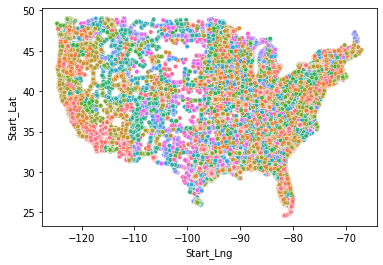

In [77]:
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, hue='County', legend=False, s=20)

Looks like there are a lot of accidents! Most of the United States looks to be covered here. Let's see what the top cities for accidents are. 

First let's see how many cities there are.

In [78]:
cities = df.City.unique()
print("There are ", len(cities), " unique cities in the dataset")

There are  11790  unique cities in the dataset


In [79]:
print("Now, let's print out the list of citites and the number of accidents within that city.")
cities_by_accidents=df.City.value_counts()
cities_by_accidents

Now, let's print out the list of citites and the number of accidents within that city.


Los Angeles    68411
Houston        68265
Charlotte      56176
Miami          49965
Dallas         48525
               ...  
Seadrift           1
Swifton            1
Copperhill         1
Mulhall            1
Etoile             1
Name: City, Length: 11789, dtype: int64

The top five cities in the data set makes sense for the number of accidents reported. One could make a guess that population size could have an affect on the number of accidents. However, in data science, we like to back up our theories with data. It is clear this data set doesn't have population so let's look at [World Population Review](https://worldpopulationreview.com/us-cities) to see what the top populous cities in the United States are. 

1. New York City, NY (Population: 8,622,357)
2. Los Angeles, CA (Population: 4,085,014)
3. Chicago, IL (Population: 2,670,406)
4. Houston, TX (Population: 2,378,146)
5. Phoenix, AZ (Population: 1,743,469)
6. Philadelphia, PA (Population: 1,590,402)
7. San Antonio, TX (Population: 1,579,504)
8. San Diego, CA (Population: 1,469,490)
9. Dallas, TX (Population: 1,400,337)
10. San Jose, CA (Population: 1,036,242)

Let's also look at the top ten in the data set. 

In [80]:
cities_by_accidents.head(10)

Los Angeles    68411
Houston        68265
Charlotte      56176
Miami          49965
Dallas         48525
Austin         38808
Raleigh        31355
Atlanta        29244
Sacramento     28984
Orlando        28092
Name: City, dtype: int64

The data seems to overlap a bit. However, New York City doesn't appear at all in the top ten the dataset, which is a bit of a surprise and a detriment against the theory that large populations have more accidents. Let's see if New York City's accident count is.

In [81]:
'New York City' in df.City

False

Looks like New York City does not exist in the dataset. Maybe it is spelled a bit different. Let's see what New York has as a state.

In [82]:
'NY' in df.State

False

Looks like New York as a state does not appear as a state in the dataset. Which must be the only state that the disclaimer on the dataset mentions is missing. So, we will note that here that New York does not have data and as a dislaimer in our presentation and report.

Since we only care about data that pertains to accidents and their severity, let's drop any columns that do not really affect accidents.
1. ID - While this could be useful in another context, it does not have anything to do with the accident itself.
2. Description - This column may give more details about the accident, it doesn't help us in the context of what we are trying to work with. We could perphaps parse this column into multiple columns but for simplicity's sake we will drop it. 
3. Distance - This refers to the distance of roadway affected by the accident. We will not use it here
4. End Time - The end time of the accident does not give us any additional data
5. Wind Direction - It is highly unlikely that wind direction has a bearing on the serverity of an accdient so we will drop this.
6. End Lat and End Long - These values do not give us anymore data than we already have.
7. Country - We are dealing with United States data so everything here should already be the same country, the United States.


In [83]:
df = df.drop(['ID','Description','Distance(mi)', 'End_Time', 'Wind_Direction', 'End_Lat', 'End_Lng', 'Country'], axis=1)

A good next step that most data scientist look at is to see how much of the data is incomplete or missing. We can start by looking at the numerical data columns. First, let's see how many numerical columns there are.

In [84]:
numeric_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numeric_types)
len(numeric_df.columns)

11

There are 14 numerical columns. Let's see the percentage of missing data is in each of those columns. We will first calculate the total number of missing data per column and then divide each by the total number of rows.

In [85]:
total_missing = df.isnull().sum().sort_values(ascending=False)

missing_percentage=total_missing/len(df)
missing_percentage

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
Bump                     0.000000
Amenity                  0.000000
Start_Time               0.000000
Start_Lat                0.000000
Start_Lng                0.000000
Street                   0.000000
Side                     0.000000
County                   0.000000
State                    0.000000
Turning_Loop             0.000000
Traffic_Signal           0.000000
Traffic_Calmin

We can see there are several columns here with missing data. However, looking at just number isn't any fun. Let's plot this data so we can better visualize what it actually means.

<AxesSubplot:>

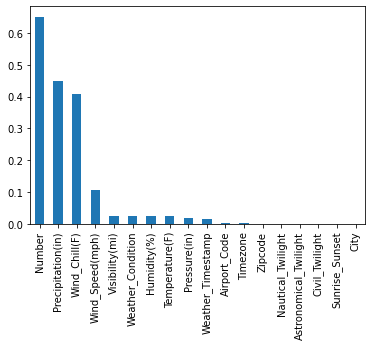

In [86]:
missing_percentage[missing_percentage!=0].plot(kind='bar')

With such large amount of missing data in these columns, we would usually drop any that have more than 50 percent missing. You may want to adjust that value according to how strict you want your calcuation to be. We are going to eliminate at anything with 40 percent or more missing: Number, Precipitation, and Wind Chill.

In [87]:
#Drop unnecessary columns
to_drop = ['Number', 'Precipitation(in)', 'Wind_Chill(F)' ]

df.drop(columns=to_drop, inplace=True, axis=1)

Let's make sure the columns were dropped.

In [88]:
total_missing = df.isnull().sum().sort_values(ascending=False)

missing_percentage=total_missing/len(df)
missing_percentage

Wind_Speed(mph)          0.105677
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
Junction                 0.000000
Give_Way                 0.000000
Start_Time               0.000000
Start_Lat                0.000000
Start_Lng                0.000000
Street                   0.000000
Side                     0.000000
County                   0.000000
State                    0.000000
Turning_Loop             0.000000
Traffic_Signal           0.000000
Traffic_Calming          0.000000
Stop                     0.000000
Station                  0.000000
Roundabout    

Before we start dropping any more rows or columns or filling in the missing data let's go ahead and break up the start time into multiple columns. This will help our prediction algorithm later on as well as fill in missing data.

In [89]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

df['Year'] = df['Start_Time'].dt.year

nmonth = df['Start_Time'].dt.month
df['Month'] = nmonth

df['Weekday']= df['Start_Time'].dt.weekday

days_each_month = np.cumsum(np.array([0,31,28,31,30,31,30,31,31,30,31,30,31]))
nday = [days_each_month[arg-1] for arg in nmonth.values]
nday = nday + df["Start_Time"].dt.day.values
df['Day'] = nday

df['Hour'] = df['Start_Time'].dt.hour

df['Minute']=df['Hour']*60.0+df["Start_Time"].dt.minute

df = df.drop('Start_Time', axis=1)

There are a few columns here with missing data that is very minimum. We will simply just drop the rows for those columns. 

In [90]:
df = df.dropna(subset=['City','Zipcode','Airport_Code',
                       'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])

With a little bit of research, we discovered that Airport code is the code for the airport weather station is. This would be a great way to fill in the missing data by grouping by airport code and with year and month and then calculating the median. While this may be intensive, it should provide better predictability. 

In [91]:
# group data by 'Airport_Code' and '' then fill NAs with median value
weather_fields=['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']

print("First, we will print out how many missing values there are before we fill in some of the values.")
print("Then, we will fill the values and then print out how many missing values there are after.")
for i in weather_fields:
    print("The number of missing values for: " + i + " before is " + df[i].isnull().sum().astype(str))
    df[i] = df.groupby(['Airport_Code', 'Year', 'Month'])[i].apply(lambda x: x.fillna(x.median()))
    print("The number of missing values for: " + i + " after is " + df[i].isnull().sum().astype(str))

First, we will print out how many missing values there are before we fill in some of the values.
Then, we will fill the values and then print out how many missing values there are after.
The number of missing values for: Temperature(F) before is 60611
The number of missing values for: Temperature(F) after is 28130
The number of missing values for: Humidity(%) before is 64657
The number of missing values for: Humidity(%) after is 28233
The number of missing values for: Pressure(in) before is 50294
The number of missing values for: Pressure(in) after is 25136
The number of missing values for: Visibility(mi) before is 65463
The number of missing values for: Visibility(mi) after is 35098
The number of missing values for: Wind_Speed(mph) before is 300542
The number of missing values for: Wind_Speed(mph) after is 37975


It appears that we have filled in a lot of the missing data. Let's calculate how much of the data is still missing.

In [92]:
total_missing = df.isnull().sum().sort_values(ascending=False)

missing_percentage=total_missing/len(df)
missing_percentage

Weather_Condition        0.022495
Weather_Timestamp        0.013899
Wind_Speed(mph)          0.013095
Visibility(mi)           0.012103
Humidity(%)              0.009736
Temperature(F)           0.009700
Pressure(in)             0.008668
Minute                   0.000000
Bump                     0.000000
Airport_Code             0.000000
Timezone                 0.000000
Zipcode                  0.000000
State                    0.000000
County                   0.000000
City                     0.000000
Side                     0.000000
Street                   0.000000
Start_Lng                0.000000
Start_Lat                0.000000
Amenity                  0.000000
Crossing                 0.000000
Hour                     0.000000
Give_Way                 0.000000
Day                      0.000000
Weekday                  0.000000
Month                    0.000000
Year                     0.000000
Astronomical_Twilight    0.000000
Nautical_Twilight        0.000000
Civil_Twilight

For simplicity sake, we will drop the remaining missing values for weather data.

In [93]:
df = df.dropna(subset=weather_fields)

We will verify that there are no more missing values for the dataset.

In [94]:
total_missing = df.isnull().sum().sort_values(ascending=False)

missing_percentage=total_missing/len(df)
missing_percentage

Weather_Condition        0.010668
Weather_Timestamp        0.006894
Minute                   0.000000
Bump                     0.000000
Wind_Speed(mph)          0.000000
Visibility(mi)           0.000000
Pressure(in)             0.000000
Humidity(%)              0.000000
Temperature(F)           0.000000
Airport_Code             0.000000
Timezone                 0.000000
Zipcode                  0.000000
State                    0.000000
County                   0.000000
City                     0.000000
Side                     0.000000
Street                   0.000000
Start_Lng                0.000000
Start_Lat                0.000000
Amenity                  0.000000
Crossing                 0.000000
Hour                     0.000000
Give_Way                 0.000000
Day                      0.000000
Weekday                  0.000000
Month                    0.000000
Year                     0.000000
Astronomical_Twilight    0.000000
Nautical_Twilight        0.000000
Civil_Twilight

The missing weather conditions and the weather timestamp are very little so let's go ahead and drop those rows as well.

In [95]:
df = df.dropna(subset=['Weather_Condition', 'Weather_Timestamp'])

Once more we will verify that there are not any missing values in the dataset. 

In [96]:
total_missing = df.isnull().sum().sort_values(ascending=False)

missing_percentage=total_missing/len(df)
missing_percentage

Minute                   0.0
Bump                     0.0
Weather_Condition        0.0
Wind_Speed(mph)          0.0
Visibility(mi)           0.0
Pressure(in)             0.0
Humidity(%)              0.0
Temperature(F)           0.0
Weather_Timestamp        0.0
Airport_Code             0.0
Timezone                 0.0
Zipcode                  0.0
State                    0.0
County                   0.0
City                     0.0
Side                     0.0
Street                   0.0
Start_Lng                0.0
Start_Lat                0.0
Amenity                  0.0
Crossing                 0.0
Hour                     0.0
Give_Way                 0.0
Day                      0.0
Weekday                  0.0
Month                    0.0
Year                     0.0
Astronomical_Twilight    0.0
Nautical_Twilight        0.0
Civil_Twilight           0.0
Sunrise_Sunset           0.0
Turning_Loop             0.0
Traffic_Signal           0.0
Traffic_Calming          0.0
Stop          

Let's save this data to a new csv file so that we can reference it more easily from here on out without running the above.

In [97]:
df.to_csv('US_Traffic_Data_Cleaned.csv')

In [3]:
df = pd.read_csv('US_Traffic_Data_Cleaned.csv')

Since we are working with Severity and predicting severity. First, let's see how many severity levels there are.

In [4]:
df['Severity'].unique()

array([2, 3, 4, 1])

The data shows 4 different values for Severity. The creator of the data set tells us: <br/>
    "the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay)."
    
Now that we know what the severity levels are, let's see how many accidents there are per severity level. 

In [9]:
df.reset_index()
df_severity = df['Severity'].value_counts()
df_severity

2    2069762
3     611747
4     113949
1      28344
Name: Severity, dtype: int64

Let's visualize this data in a chart.

<AxesSubplot:title={'center':'Severity Count'}>

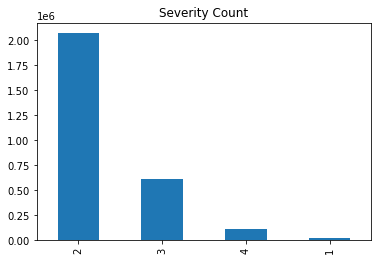

In [10]:
df_severity.plot(kind='bar', stacked=True, title='Severity Count')

We can see that most wrecks occur with a Severity level of 2 while the least is 1. 

Next, let's visualize what the number of accidents are per year

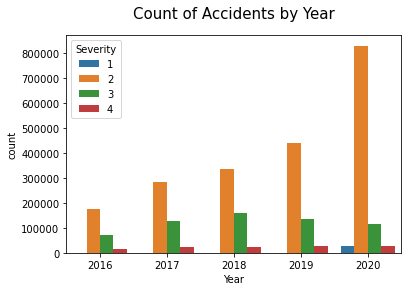

In [11]:
sns.countplot(x='Year', hue='Severity', data=df)
plt.title('Count of Accidents by Year', size=15, y=1.05)
plt.show()

That data sees a very large increase in the number of Serverity 2 accidents between 2019 and 2020. This could be for various reasons from how the data was reported and who reported it. 

Next, we should look at the the severity levels per month.

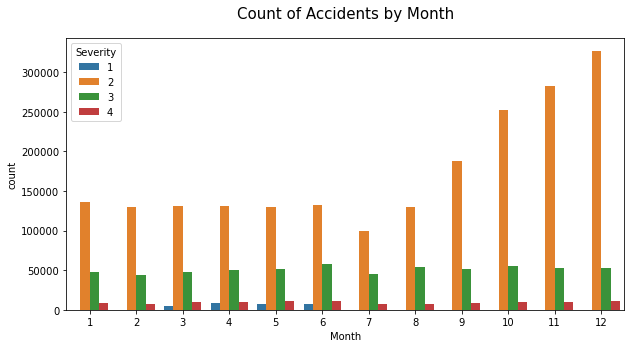

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x='Month', hue='Severity', data=df)
plt.title('Count of Accidents by Month', size=15, y=1.05)
plt.show()

The data shows a generally stable number of accidents for most severity levels except for Severity 2. Severity 2 seems to increase every month. Let's take a look at the data for each weekday.

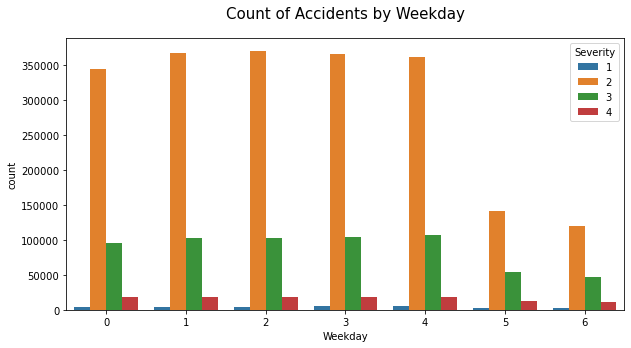

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x='Weekday', hue='Severity', data=df)
plt.title('Count of Accidents by Weekday', size=15, y=1.05)
plt.show()

The data shows that the weekend has less accidents overall than during the week. What should we look at next? You guessed it, hourly!!

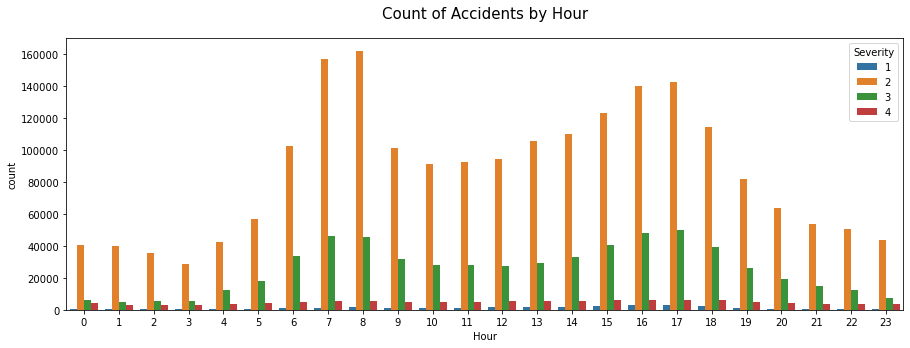

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(x='Hour', hue='Severity', data=df)
plt.title('Count of Accidents by Hour', size=15, y=1.05)
plt.show()

The hourly display shows an interesting trend as well. It appears the early mornings (perhaps going to work) and the early evenings (perhaps leaving work) have increases in the number of accidents.

If hourly is an important predictor for severity, then perhaps minute is as well. However, there are a **A LOT** of values for minute that would be hard to visualize. So, with help from [jingzongwang](https://www.kaggle.com/jingzongwang/usa-car-accidents-severity-prediction), we will encode the minute column to create a frequency.

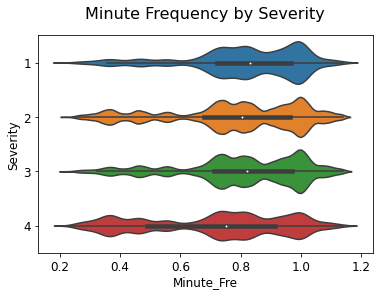

In [15]:
# frequence encoding and log-transform
df['Minute_Freq'] = df.groupby(['Minute'])['Minute'].transform('count')
df['Minute_Freq'] = df['Minute_Freq']/df.shape[0]*24*60
df['Minute_Freq'] = df['Minute_Freq'].apply(lambda x: np.log(x+1))


# plot
df['Severity'] = df['Severity'].astype('category')
sns.violinplot(x='Minute_Freq', y="Severity", data=df)    
plt.xlabel('Minute_Fre', size=12, labelpad=3)
plt.ylabel('Severity', size=12, labelpad=3)    
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.title('Minute Frequency by Severity', size=16, y=1.05)
plt.show()

To quote jingzongwang, "The chart above shows that the overall minute frequency of accidents with severity 4 is less than the other three levels. In other words, an accident is more likely to be a serious one when accidents happen less frequently."

That is a pretty big discovery! This would indicate that cities with more accidents actually have less severity 4 accidents by frequency than those with few accidents.

Let's get to making some predictions!



First, we will categorize some of the data! Let's look at the data type columns to figure out what we should categorize

In [16]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823802 entries, 0 to 2823801
Data columns (total 43 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   Unnamed: 0             int64   
 1   Severity               category
 2   Start_Lat              float64 
 3   Start_Lng              float64 
 4   Street                 object  
 5   Side                   object  
 6   City                   object  
 7   County                 object  
 8   State                  object  
 9   Zipcode                object  
 10  Timezone               object  
 11  Airport_Code           object  
 12  Weather_Timestamp      object  
 13  Temperature(F)         float64 
 14  Humidity(%)            float64 
 15  Pressure(in)           float64 
 16  Visibility(mi)         float64 
 17  Wind_Speed(mph)        float64 
 18  Weather_Condition      object  
 19  Amenity                bool    
 20  Bump                   bool    
 21  Crossing               bool    

In [18]:
categorical_features = ["Weather_Condition", "Sunrise_Sunset", "Civil_Twilight", "Nautical_Twilight", "Astronomical_Twilight", "Timezone"]

for cat in categorical_features:
    df[cat] = df[cat].astype("category")
    df = pd.concat([df,pd.get_dummies(df[cat],prefix=cat)],axis=1)
    df = df.drop(cat, axis = 1)


Then, we will replace all boolean values with numeric ones.

In [19]:
df = df.replace([True, False], [1, 0])

Let's drop the remaining columns that are objects except for State.


In [20]:
df = df.drop(['Unnamed: 0', 'Street', 'Side', 'City', 'County', 'Zipcode', 'Airport_Code', 'Weather_Timestamp'], axis = 1)

We will now seperate the data by state and run a RandomForestClassifier for each state. 

In [21]:
states = df["State"].unique()
states

array(['SC', 'NC', 'CA', 'NV', 'FL', 'CO', 'TN', 'NY', 'TX', 'AZ', 'NJ',
       'MI', 'GA', 'VA', 'IN', 'LA', 'PA', 'MN', 'OH', 'CT', 'IL', 'MD',
       'MO', 'OR', 'NE', 'OK', 'UT', 'WA', 'AL', 'WI', 'MA', 'DC', 'MS',
       'KY', 'ME', 'IA', 'KS', 'WV', 'AR', 'ID', 'RI', 'WY', 'NM', 'MT',
       'NH', 'DE', 'ND', 'SD', 'VT'], dtype=object)

Let's see what the counts are for each state

In [26]:
df.State.value_counts()

CA    710536
FL    259173
TX    221716
NY    123745
NC    120776
SC    117896
OR     96473
PA     88270
VA     83452
IL     77283
MN     76534
GA     68271
MI     66769
AZ     59229
TN     54992
LA     49242
WA     48973
NJ     48497
OH     47444
UT     43004
MD     41353
CO     36674
OK     34654
AL     32704
MO     27993
IN     24430
CT     23914
MA     23598
KY     15152
WI     14463
NE     13613
IA      9124
RI      7857
NV      7676
NH      6100
KS      5402
MS      5262
DE      4608
DC      4563
AR      4550
NM      3921
ID      3747
WV      3305
MT      3154
ME      2182
VT       517
ND       421
WY       375
SD       215
Name: State, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823802 entries, 0 to 2823801
Columns: 169 entries, Severity to Timezone_US/Pacific
dtypes: float64(9), int64(159), object(1)
memory usage: 3.6+ GB


For simplicity sake, we are focusing on Texas for our predictions. We will first look at Texas and then compare it to California (high count), Tennessee (mid count), and Arkansas (low count).

/Users/chickingbottom/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Classification report for TX
              precision    recall  f1-score   support

           1       0.76      0.72      0.74       316
           2       0.80      0.93      0.86     47828
           3       0.64      0.39      0.48     17024
           4       0.75      0.18      0.29      1347

    accuracy                           0.77     66515
   macro avg       0.74      0.55      0.59     66515
weighted avg       0.76      0.77      0.75     66515



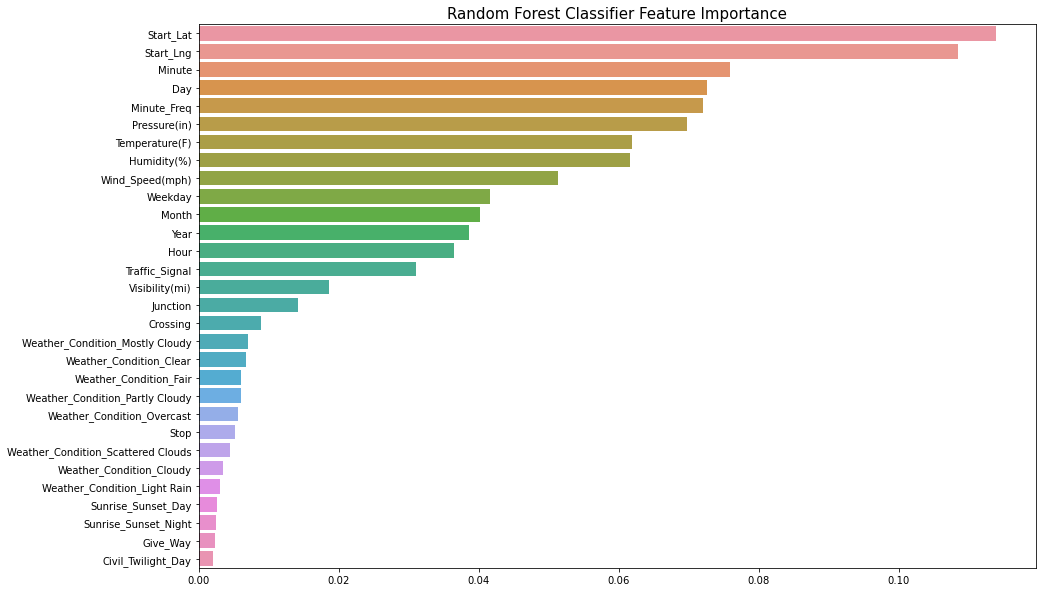

In [29]:
def run_prediction_report(state):
    if state == '*': 
        tmp_df = df.drop('State', axis=1)
    else: 
        tmp_df = df[df["State"] == state].drop('State', axis=1)
    
    # split X, y
    X = tmp_df.drop('Severity', axis=1)
    y = tmp_df['Severity']

    # split train, test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    
    clf_base = RandomForestClassifier()
    grid = {'n_estimators': [10, 50, 100],
        'max_features': ['auto','sqrt']}
    clf_rf = GridSearchCV(clf_base, grid, cv=5, n_jobs=8, scoring='balanced_accuracy')
    clf_rf.fit(X_train, y_train)
    y_pred = clf_rf.predict(X_test)
    print ('Classification report for ' + state)
    print (classification_report(y_test, y_pred))
    importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=['importance'], index=tmp_df.drop('Severity',axis=1).columns)

    importances.iloc[:,0] = clf_rf.best_estimator_.feature_importances_

    importances.sort_values(by='importance', inplace=True, ascending=False)
    importances30 = importances.head(30)

    plt.figure(figsize=(15, 10))
    sns.barplot(x='importance', y=importances30.index, data=importances30)

    plt.xlabel('')
    plt.tick_params(axis='x', labelsize=10)
    plt.tick_params(axis='y', labelsize=10)
    plt.title('Random Forest Classifier Feature Importance', size=15)

    plt.show()
    
run_prediction_report("TX")
    

/Users/chickingbottom/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Classification report for CA
              precision    recall  f1-score   support

           1       0.80      0.47      0.59      1740
           2       0.84      0.96      0.90    169061
           3       0.61      0.30      0.41     39857
           4       0.82      0.25      0.39      2503

    accuracy                           0.82    213161
   macro avg       0.77      0.49      0.57    213161
weighted avg       0.80      0.82      0.80    213161



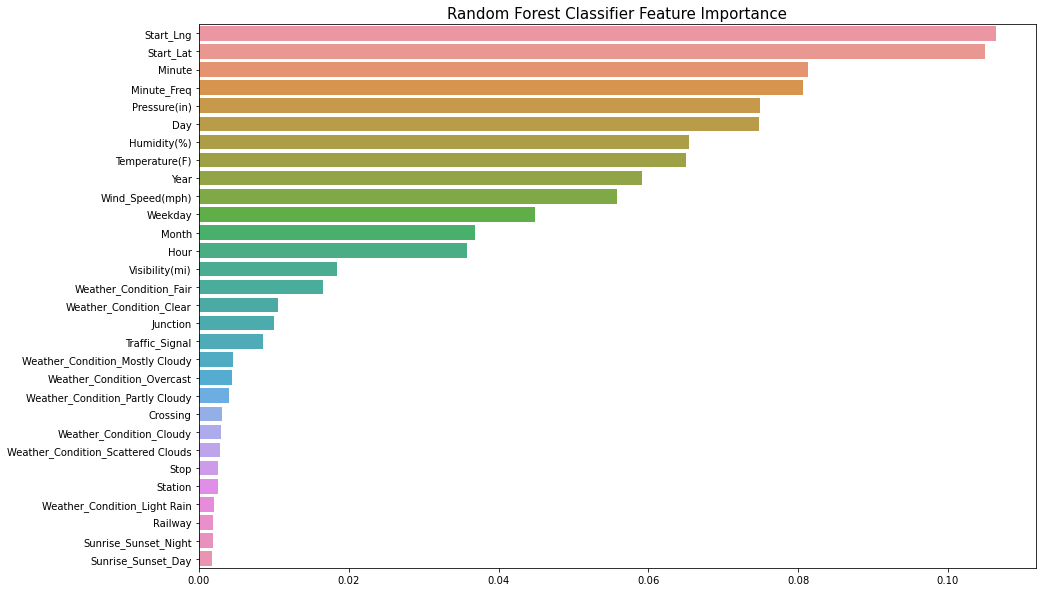

In [30]:
run_prediction_report("CA")

/Users/chickingbottom/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Classification report for TN
              precision    recall  f1-score   support

           1       0.48      0.29      0.36       468
           2       0.78      0.92      0.84     11783
           3       0.56      0.33      0.42      3710
           4       0.71      0.27      0.39       537

    accuracy                           0.75     16498
   macro avg       0.64      0.45      0.50     16498
weighted avg       0.72      0.75      0.72     16498



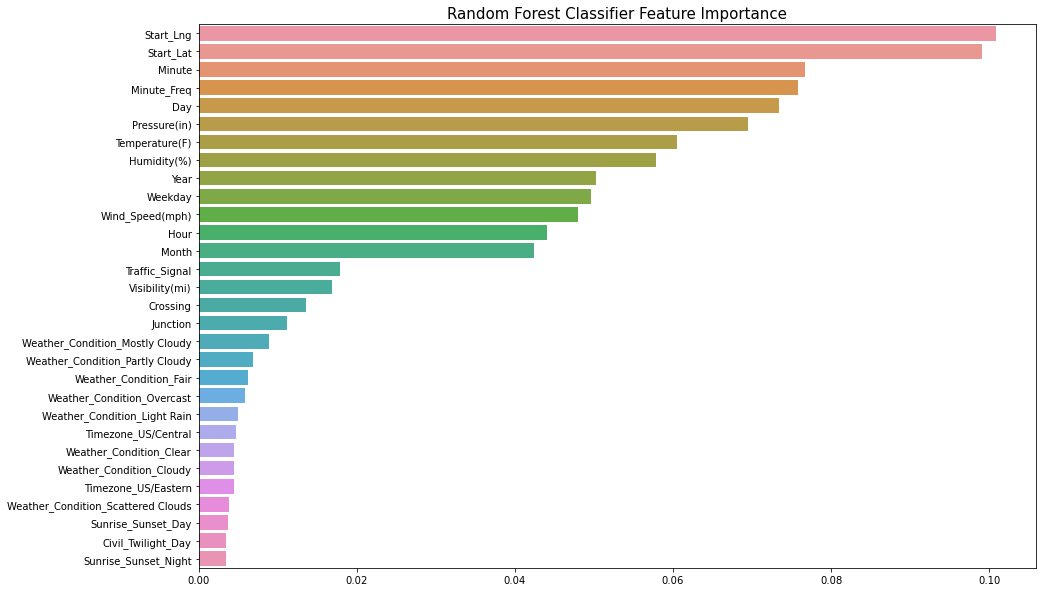

In [31]:
run_prediction_report("TN")

Classification report for AR
              precision    recall  f1-score   support

           1       1.00      0.40      0.57         5
           2       0.82      0.93      0.88      1041
           3       0.44      0.17      0.24       120
           4       0.56      0.40      0.47       199

    accuracy                           0.79      1365
   macro avg       0.71      0.47      0.54      1365
weighted avg       0.75      0.79      0.76      1365



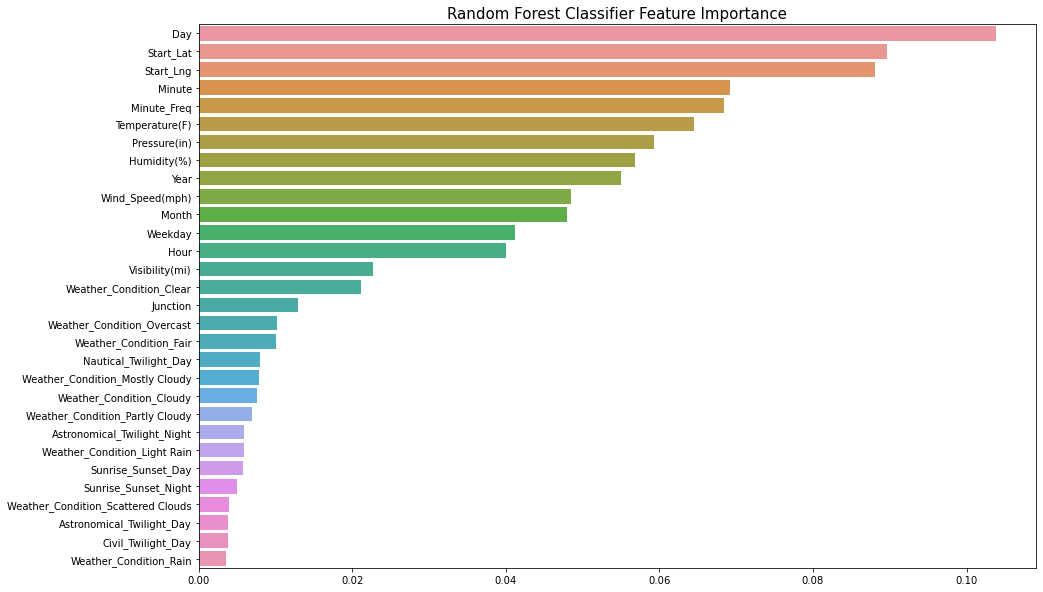

In [32]:
run_prediction_report("AR")